# Deep learning Practical Assignment #3:
## Convolutional Neural Networks


Linear Classifier : Fully connected networks
Binome : Zeineb Medallel et Mayssa Ben Mefteh



##### Loading the iris dataset

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

import numpy as np
import pandas as pd


iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 (for convergence of the neural network) 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data set into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(
X_scaled, Y, test_size=0.5, random_state=2)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [2]:
# model
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

def create_custom_model(input_dim, output_dim, nodes, n=1, name='model'):
    def create_model():
        # creating the  model
        model = Sequential(name=name)
        for i in range(n):
            model.add(Dense(nodes, input_dim=input_dim, activation='relu'))
        model.add(Dense(output_dim, activation='softmax'))

        # creating the model
        model.compile(loss='categorical_crossentropy', 
                      optimizer='adam', 
                      metrics=['accuracy'])
        return model
    return create_model

models = [create_custom_model(n_features, n_classes, 8, i, 'model_{}'.format(i)) 
          for i in range(1, 4)]

for create_model in models:
    create_model().summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 3)                 27        
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________
Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 40        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 3)        

In [3]:
# training the model
from keras.callbacks import TensorBoard
history_dict = {}
# TensorBoard Callback
cb = TensorBoard()

### Implementing fully connected dataset
In this segment we are using keras

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense

#initialisation of the model
model = keras.Sequential()

# Sample code to create a fully connected network

model.add(layers.Dense(12, activation="relu"))
model.add(layers.Dense(5, activation="relu"))
model.add(layers.Dense(3))

# Call model on a test input
x = tf.ones((3, 3))
y = model(x)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (3, 12)                   48        
                                                                 
 dense_10 (Dense)            (3, 5)                    65        
                                                                 
 dense_11 (Dense)            (3, 3)                    18        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [5]:
# compiling the keras model
model.compile( loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

#fitting the keras model
model.fit(x, y, epochs=150, batch_size=10)

Epoch 1/150
1/1 [==============================] - 1s 945ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 2/150
1/1 [==============================] - 0s 24ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 3/150
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 4/150
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 5/150
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 6/150
1/1 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 7/150
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 8/150
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 9/150
1/1 [==============================] - 0s 3ms/step - loss: 0.0000e+00 - accuracy: 1.0000
Epoch 10/150
1/1 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - acc

# Working with Mnist dataset 

In [6]:
#Importing librairies 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten, Activation,MaxPool2D 

In [7]:
# load the dataset 
(X_train,y_train),(X_test,y_test)=mnist.load_data()


In [8]:
#Shape of the data 
print('Training data ',X_train.shape,'-',y_train.shape)
print('Test data ',X_test.shape,'-',y_test.shape)

Training data  (60000, 28, 28) - (60000,)
Test data  (10000, 28, 28) - (10000,)


(-0.5, 27.5, 27.5, -0.5)

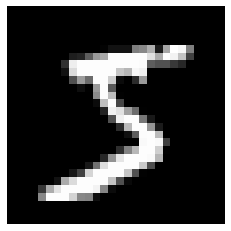

In [9]:
#Viewing the data 
plt.imshow(X_train[0],cmap='gray')
plt.axis('off')

In [10]:
#Reshape data into a long vector 
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [11]:
## Scaling data 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [12]:
# Categorical encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [13]:
#Let's see what happened to categorical variable 
print(y_train[0])
print(y_train_cat[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


##### Fully Connected Network

In [14]:
## Fully Connected Architecture 
# Here we used a total of three hidden layers with ‘relu’ activation function apart from input and output layer
model = Sequential()
model.add(Dense(256, input_dim=28*28, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


## Printing model summary 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 256)               200960    
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 128)               32896     
                                                                 
 dense_15 (Dense)            (None, 32)                4128      
                                                                 
 dense_16 (Dense)            (None, 10)                330       
                                                                 
Total params: 304,106
Trainable params: 304,106
Non-trainable params: 0
_________________________________________________________________


In [15]:
# Fitting fully connected model with validation_split as 0.3
h = model.fit(X_train, y_train_cat, batch_size=128, epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 2s 5ms/step - loss: 0.3420 - accuracy: 0.8987 - val_loss: 0.2000 - val_accuracy: 0.9384
Epoch 2/5
329/329 [==============================] - 1s 4ms/step - loss: 0.1242 - accuracy: 0.9626 - val_loss: 0.1167 - val_accuracy: 0.9647
Epoch 3/5
329/329 [==============================] - 1s 4ms/step - loss: 0.0806 - accuracy: 0.9756 - val_loss: 0.1135 - val_accuracy: 0.9679
Epoch 4/5
329/329 [==============================] - 1s 4ms/step - loss: 0.0600 - accuracy: 0.9814 - val_loss: 0.1040 - val_accuracy: 0.9727
Epoch 5/5
329/329 [==============================] - 1s 4ms/step - loss: 0.0437 - accuracy: 0.9866 - val_loss: 0.1211 - val_accuracy: 0.9679


Text(0.5, 0, 'Epochs')

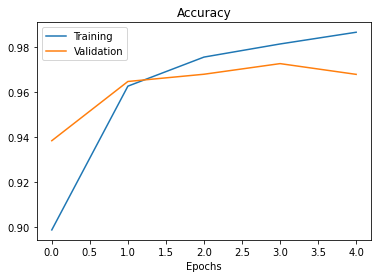

In [16]:
## Visualising Training and Validation Accuracy
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

In [17]:
test_accuracy = model.evaluate(X_test, y_test_cat)[1]
print("Test Accuracy",np.round((test_accuracy)*100,2))

313/313 [==============================] - 0s 1ms/step - loss: 0.1062 - accuracy: 0.9708
Test Accuracy 97.08


##### Convolutional Network

In [18]:
## Reshaping independent variable for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

In [19]:
# CNN architecture

# In this model we added 3 convolutional layers with activation as ‘relu’ and a max pool layer after the first convolutional layer.
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1),activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(Conv2D(32, (3, 3),activation='relu'))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 2592)              0         
                                                                 
 dense_17 (Dense)            (None, 32)                82976     
                                                      

In [20]:
h1=model.fit(X_train, y_train_cat, batch_size=128,epochs=5, verbose=1, validation_split=0.3)

Epoch 1/5
329/329 [==============================] - 20s 60ms/step - loss: 0.2801 - accuracy: 0.9147 - val_loss: 0.1484 - val_accuracy: 0.9561
Epoch 2/5
329/329 [==============================] - 19s 59ms/step - loss: 0.0729 - accuracy: 0.9777 - val_loss: 0.0770 - val_accuracy: 0.9751
Epoch 3/5
329/329 [==============================] - 20s 62ms/step - loss: 0.0478 - accuracy: 0.9854 - val_loss: 0.0565 - val_accuracy: 0.9833
Epoch 4/5
329/329 [==============================] - 19s 57ms/step - loss: 0.0360 - accuracy: 0.9887 - val_loss: 0.0516 - val_accuracy: 0.9856
Epoch 5/5
329/329 [==============================] - 19s 57ms/step - loss: 0.0278 - accuracy: 0.9910 - val_loss: 0.0534 - val_accuracy: 0.9856


In [21]:
model.evaluate(X_test, y_test_cat)


313/313 [==============================] - 1s 3ms/step - loss: 0.0403 - accuracy: 0.9872


[0.040309593081474304, 0.9872000217437744]

On test data with 10,000 images, accuracy for the fully connected neural network is 98.7%.

Text(0.5, 0, 'Epochs')

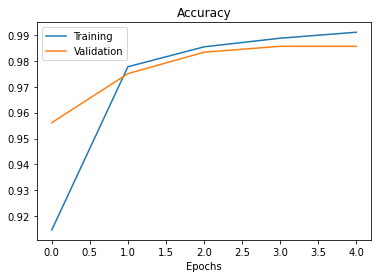

In [22]:
## Visualising Training and Validation Accuracy
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')

Conclusion:
fully connected networks make no assumptions about the input they tend to perform less and aren’t good for feature extraction while on the other hand CNNs are trained to identify and extract the best features from the images

##### using the digit dataset

In [23]:
# cnn model with batch normalization for mnist
from numpy import mean
from numpy import std
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD


# loading the dataset
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()

# summary
print("------------------------------Summary -------------------")
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))



------------------------------Summary -------------------
Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [24]:
# loading dataset
(trainX, trainY), (testX, testY) = mnist.load_data()
# reshaping the dataset to have a single channel
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

# one hot encode target values
trainY = keras.utils.to_categorical(trainY)
testY = keras.utils.to_categorical(testY)

# loading training and testing dataset
def load_dataset():
    # loading dataset
    (trainX, trainY), (testX, testY) = mnist.load_data()
    # reshaping dataset to have a single channel
    trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
    testX = testX.reshape((testX.shape[0], 28, 28, 1))
    # one hot encode target values
    trainY = keras.utils.to_categorical(trainY)
    testY = keras.utils.to_categorical(testY)
    return trainX, trainY, testX, testY



In [25]:
# scale pixels
def prep_pixels(train, test):
    # converting from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalizing to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    return train_norm, test_norm


In [26]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(10, activation='softmax'))
    # compiling the model
    opt = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Implementing VGG16 architecture  

In [27]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [28]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [29]:
faces = fetch_olivetti_faces()


X = faces.data
y = faces.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Creating the convolution    
→ 2 x convolution layer of 64 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

→ 2 x convolution layer of 128 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

→ 3 x convolution layer of 256 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2

→ 3 x convolution layer of 512 channel of 3x3 kernal and same padding

→ 1 x maxpool layer of 2x2 pool size and stride 2x2


In [30]:
#initialising the model by specifying that the model is a sequential model

model = Sequential()

model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))

model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))



In [31]:
#adding relu so that all the negative values are not passed to the next layer

model.add( Dense (12 , input_dim =faces.data.shape[1] , activation ='relu'))
model.add( Dense (5 , activation ='relu'))
model.add( Dense (40, activation ='softmax'))


In [32]:
#compile the model from keras.optimizers 

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [33]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_6 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                  

In [35]:
# Fit the Model

hist=  model.fit(X_train , epochs =50 , batch_size =int(X.shape[1] / 4))


 ### Fine-tuning a pretrained model

In [36]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import os
import random
from tqdm import tqdm # for progress bar

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers
from tensorflow import keras

# Library for Transfer Learning
from tensorflow.keras.applications import VGG16
from keras.applications.vgg16 import preprocess_input


In [37]:
#Load the data

(xtrain,ytrain),(xtest,ytest)= keras.datasets.mnist.load_data()

#Convert the images into 3 channels

xtrain=np.dstack([xtrain] * 3)
xtest=np.dstack([xtest]*3)
xtrain.shape,xtest.shape
xtrain = xtrain.reshape(-1, 28,28,3)
xtest= xtest.reshape (-1,28,28,3)
xtrain.shape,xtest.shape

((60000, 28, 28, 3), (10000, 28, 28, 3))

In [38]:
from keras.preprocessing.image import img_to_array, array_to_img

xtrain = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtrain])
xtest = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in xtest])
#train_x = preprocess_input(x)
xtrain.shape, xtest.shape

((60000, 48, 48, 3), (10000, 48, 48, 3))

In [39]:
#Implementing VGG16

# we are using VGG16 for transfer learnin here. So we have imported it
from tensorflow.keras.applications import VGG16

# initializing model with weights='imagenet'i.e. we are carring its original weights
model_vgg16=VGG16(weights='imagenet')

# display the summary to see the properties of the model
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:

# let us prepare our input_layer to pass our image size. default is (224,224,3). we will change it to (48,48,3)
input_layer=layers.Input(shape=(48,48,3))

# initialize the transfer model VGG16 with appropriate properties per our need.

model_vgg16=VGG16(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
model_vgg16.summary()


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

### FC vs CNN 